In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import linear_regression
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5aoz_j_u because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
EXP_ID = '230522-1159'
data_folder = '../data/' + EXP_ID + '/'
exp_filename = data_folder + 'energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

# Reading the Experiment Data

In [4]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_kJ'] = exp_df['energy_uJ'] * 10e-9
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df

,cc,mtu,bitrate,n_core,duration,cnt,energy_uJ,energy_kJ,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd
0,stress,9000,0,0,10.0,1,2.296152e+08,2.296152,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,stress,9000,0,0,10.0,2,2.197774e+08,2.197774,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stress,9000,0,0,10.0,3,2.107661e+08,2.107661,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stress,9000,0,0,10.0,4,2.391192e+08,2.391192,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stress,9000,0,0,10.0,5,2.113606e+08,2.113606,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,cubic,9000,10,0,100.0,6,3.610187e+09,36.101867,31.963196,2.541230,29.421967,100.000042,1.237326e+11,9.898606e+09,3927.0,0.865,1.009,1.154,1413784.0
1088,cubic,9000,10,0,100.0,7,3.571058e+09,35.710579,30.694662,2.613077,28.081584,100.000054,1.237234e+11,9.897871e+09,2955.0,1.098,1.140,1.183,1548004.0
1089,cubic,9000,10,0,100.0,8,3.624863e+09,36.248627,31.228100,2.723226,28.504875,100.000032,1.237368e+11,9.898942e+09,3053.0,1.061,1.233,1.405,1691172.0
1090,cubic,9000,10,0,100.0,9,3.553282e+09,35.532819,30.088039,2.777129,27.310909,100.000035,1.237292e+11,9.898334e+09,3187.0,0.955,1.051,1.147,1395888.0


# Energy Consumption Analysis

In [5]:
if ('n_core' not in exp_df.columns):
    exp_df.groupby(['duration', 'cc'])['energy_kJ'].mean().unstack().plot.bar(
        yerr=exp_df.groupby(['duration', 'cc'])['energy_kJ'].std().unstack(), 
        error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
        )

    plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
    plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    # plt.ylim((0,50))
    plt.xticks(rotation = 0)
    plt.grid(linestyle=LINE_STYLE)
    leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
    # plt.setp(leg.get_title(),fontsize=FONT_SIZE)
    plt.gca().spines["right"].set_linestyle(LINE_STYLE)
    plt.gca().spines["right"].set_alpha(0.5)
    plt.gca().spines["right"].set_color('gray')
    plt.gca().spines["left"].set_linestyle(LINE_STYLE)
    plt.gca().spines["left"].set_alpha(0.5)
    plt.gca().spines["left"].set_color('gray')
    plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["top"].set_linestyle(LINE_STYLE)
    # plt.gca().spines["top"].set_alpha(0.5)
    # plt.gca().spines["top"].set_color('gray')
    plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["bottom"].set_color('gray')
    plt.tight_layout()

    if (SAVE_FIG):
        plt.savefig( out_dir + '/cubic_vs_sleep_energy.pdf')

    plt.show()

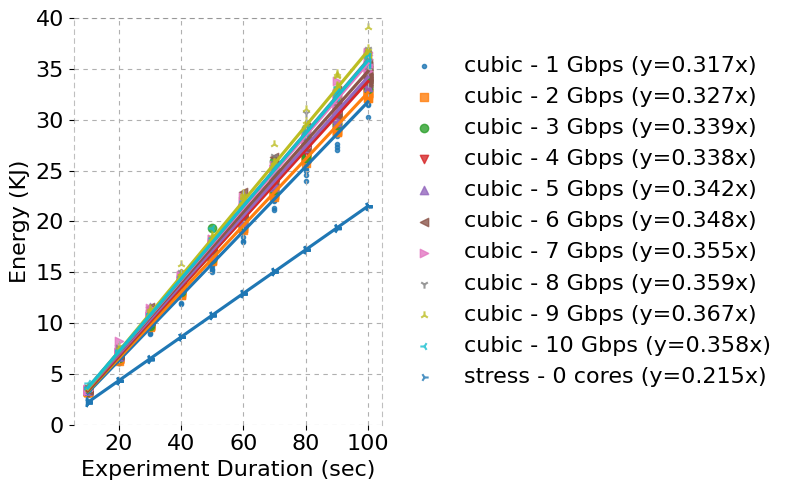

In [6]:
plt.figure(figsize=FIG_SIZE)

marker = 0
for cca, df in exp_df.groupby('cc'):
    # x = np.hstack((np.reshape(ddf['time_sec'], (-1, 1)), np.ones((len(ddf),1))))
    # y = np.reshape(ddf['energy_kJ'], (-1, 1))
    # fit = np.linalg.lstsq(x, y, rcond=None)[0]

    if (cca in ['stress', 'sleep']):
        for n_core, ddf in df.groupby('n_core'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_kJ'], proportional=True)

            sns.regplot(ddf, x = 'time_sec', y = 'energy_kJ', 
                        label='{} - {} cores (y={:.3f}x)'.format(cca, n_core, slope), ax=plt.gca(),
                        marker=list(Line2D.markers.keys())[marker])
            marker += 1
    else:
        for bitrate, ddf in df.groupby('bitrate'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_kJ'], proportional=True)

            sns.regplot(ddf, x = 'time_sec', y = 'energy_kJ', 
                        label='{} - {} Gbps (y={:.3f}x)'.format(cca, bitrate, slope), ax=plt.gca(),
                        marker=list(Line2D.markers.keys())[marker])
            marker += 1

plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0,40))
plt.xticks(rotation = 0)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='center left', frameon=False, fontsize=FONT_SIZE,
                       bbox_to_anchor=(1., 0.5))
# plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
# plt.gca().spines["bottom"].set_alpha(0.5)
# plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cubic_vs_stress_energy_fit.pdf')

plt.show()